<a href="https://colab.research.google.com/github/ijeoma91/Anomaly_Detection/blob/main/Mental_Health_Unsupervised_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install hdbscan



#Project Topic

# **Mental Health In Tech Survey**

Dataset Contents
The following are what the dataset columns means:

1. Timestamp

2. Age

3. Gender

4. Country

5. state: If you live in the United States, which state or territory do you   live in?

6. self_employed: Are you self-employed?

7. family_history: Do you have a family history of mental illness?

8. treatment: Have you sought treatment for a mental health condition?

9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

10. no_employees: How many employees does your company or organization have?

11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?

12. tech_company: Is your employer primarily a tech company/organization?

13. benefits: Does your employer provide mental health benefits?

14. care_options: Do you know the options for mental health care your employer provides?

15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

18. leave: How easy is it for you to take medical leave for a mental health condition?

19. mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

20. physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?

22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

23. mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

24. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

25. mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

27. comments: Any additional notes or comments





# Unsupervised Learning  Project Objectives


# project Concepts:

1. How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
2. What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace

In [7]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.3 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6318 sha256=bd71371c28a4c59fc61969330f373a98cbfb385e86edfe60a72a9cdb5373a6ea
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


**# 1. Libaries Importation**

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from ReliefF import ReliefF
#import umap as umap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount( '/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**# 1.1. Data Extraction**

In [110]:
# Let's read the dataset using the csv format
path = "/content/drive/MyDrive/survey.csv"
Mental_df = pd.read_csv(path)
Mental_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


After reading our dataset, we can clearly see that our dataset was not proper stored. Some features have upper case while some have lower case. Let's Correct those features before we can our dataset preprocessing.

In [111]:
Mental_df.rename(columns = {"	Timestamp":	"Timestamp", "Age":"Age","Gender":"Gender", "Country":"Country", "state":"State","self_employed":"Self_Employed", "family_history": "Family_History", "treatment":"Treatment", "work_interfere": "Work_Interfere", "no_employees":"No_Employees", "remote_work":"Remote_Work","tech_Company":"Tech_Company", "benefits":"Benefits", "care_options":"Care_Options", "wellness_program": "Wellness_Program", "seek_help":"Seek_Help", "anonymity":"Anonymity", "leave":"Leave","mental_health_consequence":"Mental_Health_Consequence", "phys_health_consquence":"Phys_Health_Consequence","coworker":"Co_workers", "supervisor":"Supervisor", "mental_health_interview":"Mental_Health_Interview",
                            "phys_health_interview":"Phys_Health_Interview", "mental_vs_physical":"Mental_vs_Physical", "obs_consequence":"Obs_Consequence", "comments":"Comments"}, inplace=True)
Mental_df

,Timestamp,Age,Gender,Country,State,Self_Employed,Family_History,Treatment,Work_Interfere,No_Employees,...,Leave,Mental_Health_Consequence,phys_health_consequence,coworkers,Supervisor,Mental_Health_Interview,Phys_Health_Interview,Mental_vs_Physical,Obs_Consequence,Comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


Our dataset naming convention is now corrected. Now well now check our data numerical distributions and then further to the data preprocessing

**# 1.2 Understand the Numerical Data**

In [112]:
# Let's use the describe method to quickly analysis the dataset with pandas
# The describe method output the statistics summary of dataframe such as mean, maximum and minimum values of a dataset


Mental_df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


**# 1.3 Understand the Whole Datase**

.info()


This returns the summary of the dataset and also the count of the non-null values of the dataset

In [113]:
Mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   State                      744 non-null    object
 5   Self_Employed              1241 non-null   object
 6   Family_History             1259 non-null   object
 7   Treatment                  1259 non-null   object
 8   Work_Interfere             995 non-null    object
 9   No_Employees               1259 non-null   object
 10  Remote_Work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  Benefits                   1259 non-null   object
 13  Care_Options               1259 non-null   object
 14  Wellness



**2. # MSNO to visualize and Identify a Missing Values**

**Firstly, we will use Msno & Matrix**

The matrix plot is a powerful tool which provide a colour fill for each feature in the dataset. When there is a complete values in a feature, it indicate grey in that particular column but when it is absent , it shows white

Timestamp                       0
Age                             0
Gender                          0
Country                         0
State                         515
Self_Employed                  18
Family_History                  0
Treatment                       0
Work_Interfere                264
No_Employees                    0
Remote_Work                     0
tech_company                    0
Benefits                        0
Care_Options                    0
Wellness_Program                0
Seek_Help                       0
Anonymity                       0
Leave                           0
Mental_Health_Consequence       0
phys_health_consequence         0
coworkers                       0
Supervisor                      0
Mental_Health_Interview         0
Phys_Health_Interview           0
Mental_vs_Physical              0
Obs_Consequence                 0
Comments                     1095
dtype: int64

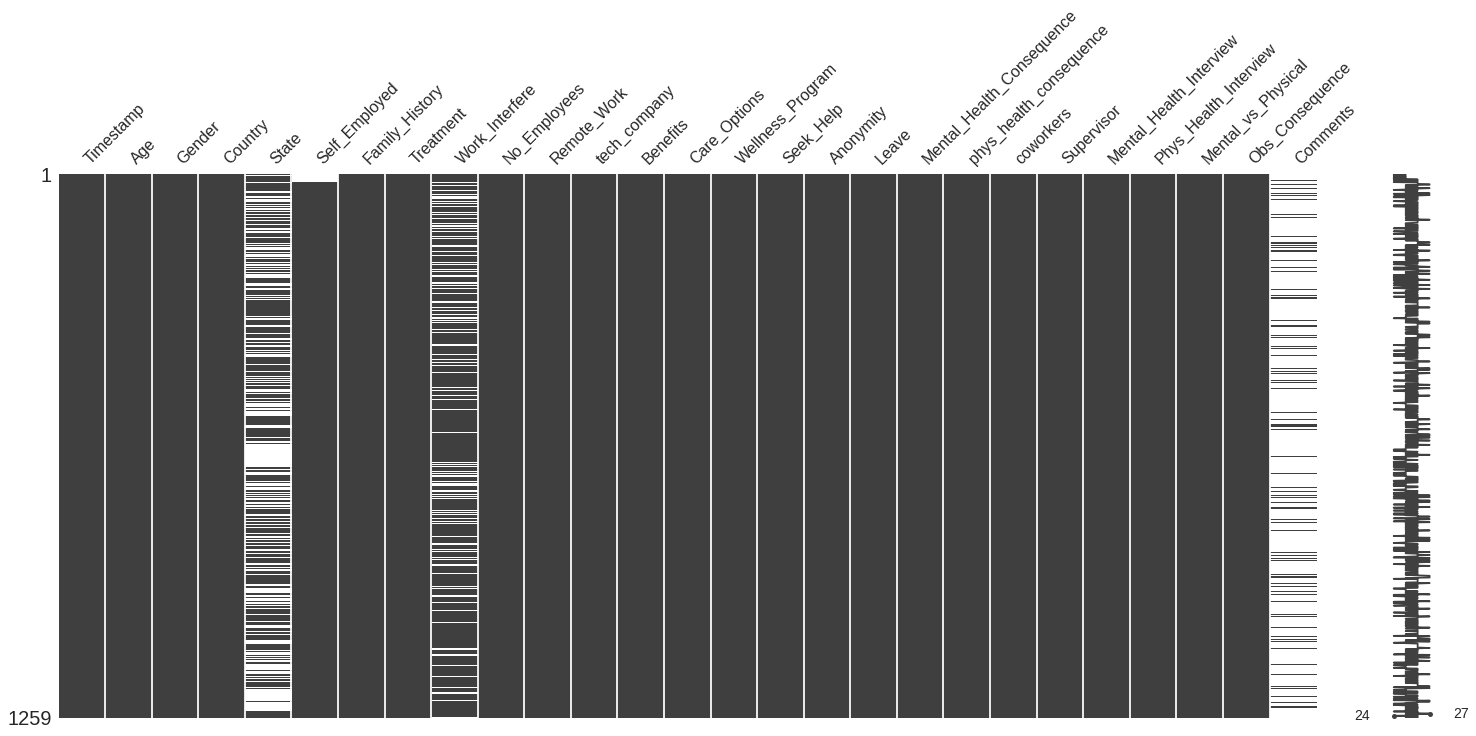

In [114]:


msno.matrix(Mental_df)
Mental_df.isnull().sum()

**Secondly, we will use  Barplot with MSNO to visulize our missing values**

The Barplot visualize data in line, so implementing it with MSNO will show how Null values reflect on the Barplot lines

Timestamp                       0
Age                             0
Gender                          0
Country                         0
State                         515
Self_Employed                  18
Family_History                  0
Treatment                       0
Work_Interfere                264
No_Employees                    0
Remote_Work                     0
tech_company                    0
Benefits                        0
Care_Options                    0
Wellness_Program                0
Seek_Help                       0
Anonymity                       0
Leave                           0
Mental_Health_Consequence       0
phys_health_consequence         0
coworkers                       0
Supervisor                      0
Mental_Health_Interview         0
Phys_Health_Interview           0
Mental_vs_Physical              0
Obs_Consequence                 0
Comments                     1095
dtype: int64

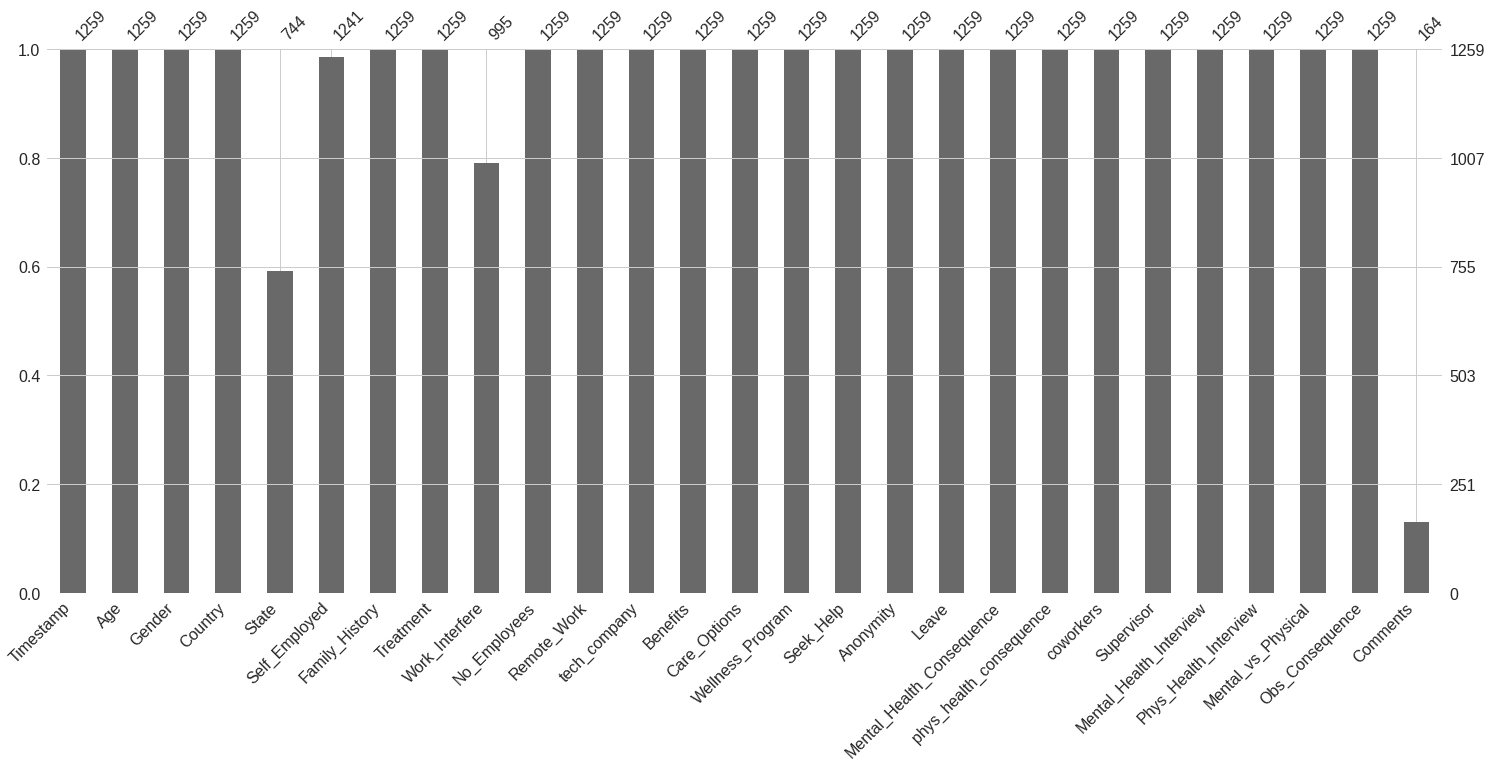

In [115]:
msno.bar(Mental_df)
Mental_df.isnull().sum()

# **Results**

Based on the two Missing value visualizations we can see that Barplot plot is much more clear than the Matrix.

**Explaination of Barplot**

We can see that we have four columns (qestions) that contain missing values and there are  listed below:

1. Work_interfer: If you have a mental health condition, do you feel that it interfer with your work?

2. Self_employed: Are you self_employed?

3. Do have a family history of mental illness?
4. Comment: Additional note or comments. 


**3. # Dataset Preprocessing**

After identifying and visualizing our dataset to see how the Null values will affect the performance of the result, now let's pre-process  the dataset to remove the Null values and dropping the columns that are not important within dataset and aslo columns that will not add value to our project.

Based on the visualization, we can see that the maximum rows of each column is 1259 for the answered question 
Some rows of are not completely answered.
Based on the Barplot Null visualization 4 columns out of 26 columns were  not completely answered by individuals. Let just say 20%  question 1259 of of rows weere not complete. 

Now Let's see each column missing value and then drop these values

In [116]:
Mental_df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
State                         515
Self_Employed                  18
Family_History                  0
Treatment                       0
Work_Interfere                264
No_Employees                    0
Remote_Work                     0
tech_company                    0
Benefits                        0
Care_Options                    0
Wellness_Program                0
Seek_Help                       0
Anonymity                       0
Leave                           0
Mental_Health_Consequence       0
phys_health_consequence         0
coworkers                       0
Supervisor                      0
Mental_Health_Interview         0
Phys_Health_Interview           0
Mental_vs_Physical              0
Obs_Consequence                 0
Comments                     1095
dtype: int64

In [117]:
# Lets drop some unimportant columns that will not add any value to the project
Unimportant_feature = pd.DataFrame(Mental_df)

Unimportant_feature.drop(['Comments', 'State'], axis=1)

,Timestamp,Age,Gender,Country,Self_Employed,Family_History,Treatment,Work_Interfere,No_Employees,Remote_Work,...,Anonymity,Leave,Mental_Health_Consequence,phys_health_consequence,coworkers,Supervisor,Mental_Health_Interview,Phys_Health_Interview,Mental_vs_Physical,Obs_Consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


We can see that the **State and Comments columns** are drop and they are no more in the dataset.**bold text**
Now Let remove the NuLL values in two categorical columns (Self_employed and
 Work_interfer)

 After dropping the Comment and State columns, we still have some Null values in our categorical feature. We will use **Fillna (Maximum occured value) to fill in the empty rows**

In [118]:
Mental_df= Mental_df.fillna(Mental_df['Work_Interfere'].value_counts().index[0])
print(Mental_df.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
State                        0
Self_Employed                0
Family_History               0
Treatment                    0
Work_Interfere               0
No_Employees                 0
Remote_Work                  0
tech_company                 0
Benefits                     0
Care_Options                 0
Wellness_Program             0
Seek_Help                    0
Anonymity                    0
Leave                        0
Mental_Health_Consequence    0
phys_health_consequence      0
coworkers                    0
Supervisor                   0
Mental_Health_Interview      0
Phys_Health_Interview        0
Mental_vs_Physical           0
Obs_Consequence              0
Comments                     0
dtype: int64


**We can now see that our dataset is well cleaned and read for further analyses.**

**4. # Data Distribution**

Now we do not have any more empty values in the dataset. Now let's do some data distribution using the Age Feature.

Note that in our daatset, Only the Age feature is our numerical feature we have.

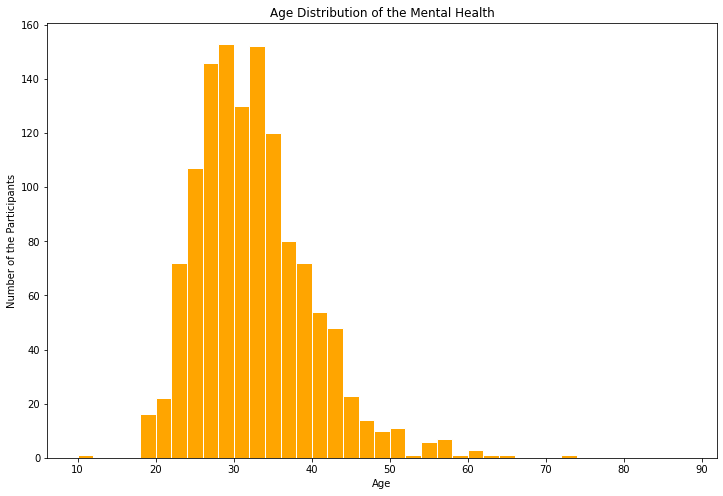

In [28]:
# Age Distribution of the Mental Health survey Participants
plt.figure(figsize=(12,8))
plt.title("Age Distribution of the Mental Health")
plt.xlabel("Age")
plt.ylabel("Number of the Participants")
plt.hist(Mental_df.Age, bins = np.arange(10,90,2), color="orange", edgecolor="white");

This is a nice Age distribution of the Survey Mental Health participants.
We can see that the most participants are between 25 to 35 years.
Low participants are 10 and 45 to 75 


***Now let's select a feature as our targert and understand the hidden character and patterns in that feature.***

In [119]:
# let's Count the frequency of Age in the dataset
Age_count = Mental_df.Age.value_counts().sort_values(ascending=False).head(10)
Age_count

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
Name: Age, dtype: int64

# Result
We can see for example Age 29 is 85 times or Age 32 is 82 time and so on.

**Based on our second dataset challenges, our project dataset, contains some unusual characters that the participant inputed when filling in their questionaries. So other characters need to be corrected before moving ahead to feature reduction, visualization and dimensionality.**

In [120]:
# Let's check the Gender of the Survey Participants
Gender_counts = Mental_df.Gender.value_counts()
Gender_counts

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

**Result**


Based on our feature selection or our feature target, We can see that the Gender column contained so many different input variables. implementing the feature this way, will create unnecessary problem in our analysis.. So we will correct by grouping them into three categorical

In [122]:
# We have renamed our column the same pervious name

Mental_df.rename(columns={"Gender": "Gender"}, inplace=True)

# Since the genders have different variables or attributes inputed which will cause future problem like encoding, so we will summary it in 3 variables

Mental_df["Gender"] = Mental_df["Gender"]. replace(["Male", "male", "M",  "m", "Make", "Male", "Cis Male", "Man", "msle", "male leaning androgynous", "cis male","Mail", "Malr",
                                                   "Cis Man", "Guy (-ish) ^_^ ","Guy (-ish) ^_^", "Male (CIS)", "Male-ish",  "Maile",  "Mal", "Male(CIS)", "Male", "maile", "M", "Male"], "Male")

Mental_df["Gender"] = Mental_df["Gender"]. replace(["Female ", "female","F","f", "Woman", "Female (trans)", "Female", "Trans woman",
                                             "Female (cis)", "cis-female/femme ", "femail", "Femake","woman", "Trans-female", "Cis Female", "cis-female/femme", "cis-female/femme", "Trans woman"],"Female")

Mental_df["Gender"] = Mental_df["Gender"]. replace(["Neuter", "queer","A little about you", "p","Enby", "Agender", "Androgyne", "something kinda male?", "queer/she/they",
                                                   "non-binary", "Nah", "All", "fluid", "Genderqueer", "ostensibly male, unsure what that really means"], "Other Genders")

In [123]:
# Let's see our transformation row and count them
Gender_counts = Mental_df.Gender.value_counts()
Gender_counts

Male             990
Female           251
Other Genders     15
Male               3
Name: Gender, dtype: int64

**Result:**
We can see that we have categorically classfied our Gender in three group. W also see that Male particpanted more than Female and also other Genders.

Now let plot our pie chart

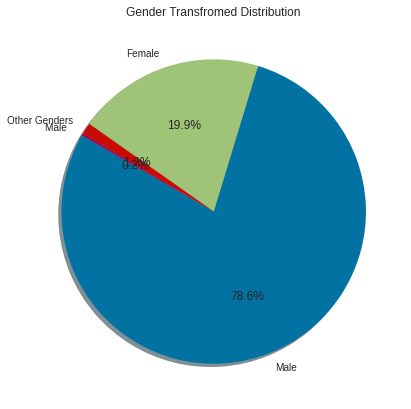

In [124]:
plt.figure(figsize=(14,7))
plt.title("Gender Transfromed Distribution")
plt.pie(Gender_counts, labels=Gender_counts.index, autopct="%1.1f%%", startangle=150, shadow=True);

**Results**
This is more And more clear that the heightest participants in Mental Health Survey was Male 78.6%, Female 20% and other

**OutLier Detection and Removal**


There are two Types to find outlier. One is Unvariate(Only one feature analysis) and Multi-variate(Two or more feature analysis). For this project will focus on the multi-variate Outlier deteection analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


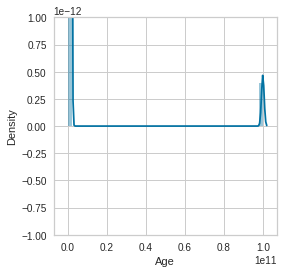

In [125]:
# For our Outliers we will use PercentaIle thréBy setting threshold value based on our project problem

#Firstly, lets plot the Age (Feature) distribution again 

sns.distplot(Mental_df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


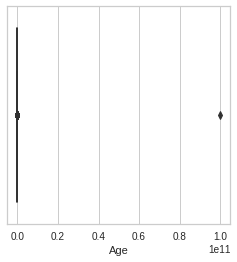

In [126]:
# Let's plot boxplot of Age

sns.boxplot(Mental_df["Age"])

In [127]:
# WE can clearly see that will have Outliers
# Let find the upper and the lower

upper_limit = Mental_df["Age"].quantile(0.99)
lower_limit = Mental_df["Age"].quantile(0.01)

In [128]:
# Let Apply Trimming
new_Mental_df = Mental_df[(Mental_df['Age'] <= 90) & (Mental_df['Age'] >= 25)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


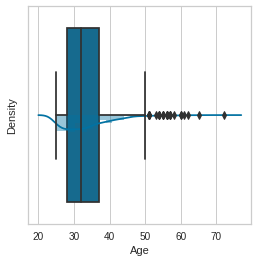

In [129]:
# let's compare ouR pervious distributions and and box-plot after trimming
sns.distplot(new_Mental_df["Age"])
sns.boxplot(new_Mental_df["Age"])

Based on the boxplot, we can see we have some outliers based on the chosen Age definitions. Now let's us limite the data extreme values, that is the outliers, to a certain arbitrary value or close to mean odf the distribution.

In [130]:
#Let's Apply Capping called Winsorization
# Reason we implemented Winsorization: We implemented Winsorization so that we cange the value so that it will be closer to other valuein the set

Clean_Date = Mental_df['Age'] = np.where(Mental_df['Age'] >= upper_limit,
        upper_limit,
        np.where(Mental_df['Age'] <= lower_limit,
        lower_limit,
        Mental_df['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


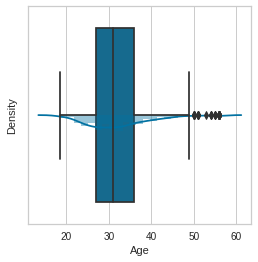

In [131]:
#Comparing the boxplot distribution and Capping boxplot.


sns.distplot(Mental_df['Age'])
sns.boxplot(Mental_df['Age'])

**Result**
We can see that the previous Boxplot has outliers and the second Boxplot had no outliers. Setting our percentile threshold value has removed the outlier

**Cleaning the Dataset (Capping Using percentile)**

We can also remove our outliers using this method. After cleaning our dataset, we will visualize The cleaned data, encode the clean dataset.

In [132]:
# Let start with the first Boxplot and show that we have outliers in the Age feature
# Using the CApping percentile method

#IQR = Q3-Q1 (It measure of statistical dispersion, being equal to the difference between upper and lower quartiles.)

import numpy as np

def outlier_detection(df):
    Mental_outlier=[]
    for x in df:
        quartile_1 = np.percentile(df , 10)
        quartile_3 = np.percentile(df , 30)
        if x > quartile_3 or x < quartile_1:
            Mental_outlier.append(x)
    print("Outliers:",Mental_outlier)
    return Mental_outlier
    
Mental_outliers = outlier_detection(Mental_df.Age)

Outliers: [37.0, 44.0, 32.0, 31.0, 31.0, 33.0, 35.0, 39.0, 42.0, 23.0, 31.0, 29.0, 42.0, 36.0, 29.0, 23.0, 32.0, 46.0, 36.0, 29.0, 31.0, 46.0, 41.0, 33.0, 35.0, 33.0, 35.0, 34.0, 37.0, 32.0, 31.0, 30.0, 42.0, 40.0, 29.0, 38.0, 50.0, 35.0, 35.0, 18.58, 30.0, 38.0, 34.0, 30.0, 22.0, 33.0, 31.0, 32.0, 32.0, 33.0, 44.0, 35.0, 40.0, 23.0, 36.0, 31.0, 34.0, 34.0, 23.0, 38.0, 33.0, 19.0, 31.0, 32.0, 38.0, 23.0, 30.0, 33.0, 31.0, 39.0, 34.0, 29.0, 32.0, 31.0, 40.0, 34.0, 18.58, 29.0, 31.0, 33.0, 30.0, 44.0, 33.0, 29.0, 35.0, 35.0, 34.0, 32.0, 22.0, 45.0, 32.0, 21.0, 18.58, 35.0, 29.0, 33.0, 36.0, 32.0, 31.0, 19.0, 33.0, 32.0, 38.0, 39.0, 39.0, 29.0, 22.0, 38.0, 37.0, 35.0, 18.58, 30.0, 37.0, 23.0, 30.0, 29.0, 19.0, 32.0, 36.0, 37.0, 36.0, 31.0, 33.0, 34.0, 42.0, 23.0, 31.0, 22.0, 23.0, 34.0, 31.0, 32.0, 45.0, 33.0, 29.0, 45.0, 43.0, 37.0, 23.0, 35.0, 38.0, 35.0, 32.0, 31.0, 35.0, 34.0, 41.0, 37.0, 34.0, 32.0, 21.0, 30.0, 40.0, 37.0, 32.0, 32.0, 30.0, 31.0, 29.0, 41.0, 34.0, 33.0, 23.0, 32.0, 3

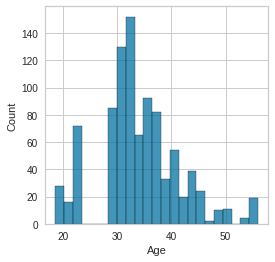

In [133]:
# Let's remove the OUtliers and thereby visualizing them using the histogram

cleaned_data = Mental_df.loc[Mental_df.Age.isin(Mental_outliers)]
sns.histplot(cleaned_data.Age)

In [134]:
# Using the Oridnal_encoder which will be imported to change the categorical values into numerical. Later we wIll perfrom custering

from category_encoders.ordinal import OrdinalEncoder

encoded_data = cleaned_data
Ordinal = OrdinalEncoder()
encoded_data = Ordinal.fit_transform(cleaned_data.drop(['Age'], axis=1))

In [135]:
# Let's show our new Encoded DataFrame.
# What we did here is that, we added a feature(Age) back after the feature was encoded to numerical vale
# The only thing we need is encode categorical features



encoded_data['Age'] = cleaned_data.Age

encoded_data.head()

,Timestamp,Gender,Country,State,Self_Employed,Family_History,Treatment,Work_Interfere,No_Employees,Remote_Work,...,Mental_Health_Consequence,phys_health_consequence,coworkers,Supervisor,Mental_Health_Interview,Phys_Health_Interview,Mental_vs_Physical,Obs_Consequence,Comments,Age
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,37.0
1,2,2,1,2,1,1,2,2,2,1,...,2,1,2,2,1,2,2,1,1,44.0
2,3,2,2,3,1,1,2,2,1,1,...,1,1,3,1,2,3,3,1,1,32.0
3,4,2,3,3,1,2,1,1,3,1,...,3,2,1,2,3,1,3,2,1,31.0
4,5,2,1,4,1,1,2,3,4,2,...,1,1,1,1,2,3,2,1,1,31.0


# **Feature Selection**
In this phase we will use two different feacture selection and then compare both result The methods which will be implemented are:

Correlation

Chi-2(Univariate Test)

# **Correlation**

 This shows trending parttern and insight on the linear dependence between variables.

Correlation = 1 show that the feature is dependantly correlated and 0 shows that the feature are not dependant.

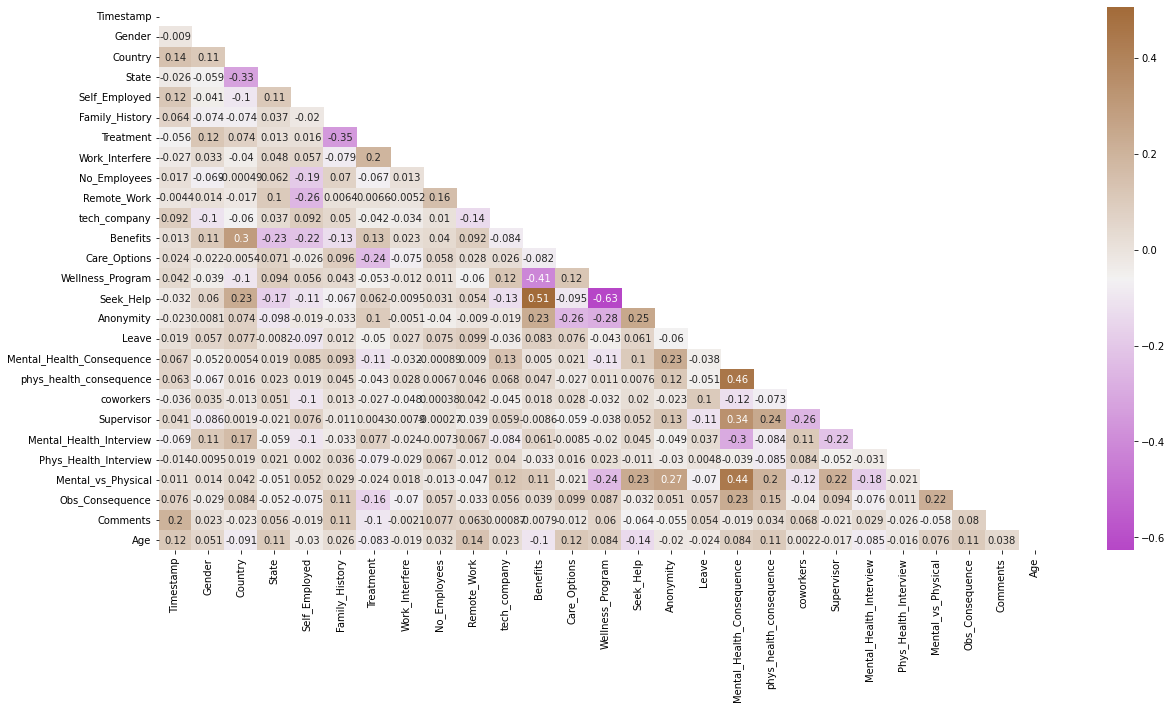

In [47]:
# Uisng a heatmap and corr to visulaize dependent correlated features

#Correlation
corr = encoded_data.corr()

# Implementation of Mapplotlib
Mental_f, ax = plt.subplots(figsize=(20,10)) 

#upper traingle mask generation
mask = np.triu(np.ones_like(corr, dtype=bool))

# Color mapping
cmap = sns.diverging_palette(300,40, as_cmap=True)

# Create the heat map
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

# **Result**
Heatmap plot shows how well the econded data is correlated. With the number in the visualization, We can essaly see the strength of the strength of the correlation. Some of the correlated features are:

1. Gender: What is the participant Gender
2. Coworker: Would you be willing to discuss a mental health issue with your coworkers?
3. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**Our main focus is one feature, which is Coworkers: Would you be willing to discuss a mental health issue with your coworkers?**

In [136]:
# Even though that we have our heatmap plot that tells the percentage of how way a features are correlated with each other. 
# It is much more importAnt Or sample to visualize in a dataset because of simiplicity
# Out of the three featureS that wEre listed that are correlated, Let chosen one as our target feature.

# As at was mentioned above that our Targeted Feature is Coworker: Would you be willing to discuss a mental health issue with your coworkers?

# First Let's rename our feature discuss_mental_health using a dictionary

encoded_data.rename(columns={"coworkers": "Discusion_Coworker"}, inplace=True)

# Now let's show the correlations between our targeted feature and other feature within the dataset

df_correlations = encoded_data.corr().unstack().sort_values(ascending=False) # Here we try to buld the correlation matrix
df_correlations = pd.DataFrame(df_correlations).reset_index() # Coverting the correlation matrix to a dataframe

df_correlations.columns = ['Discus_col1', 'Discuss_col2', 'correlation'] # Name the features
df_correlations.query("Discus_col1 == 'Discusion_Coworker' & Discuss_col2 != 'Discusion_Coworker'") # feature filtering



,Discus_col1,Discuss_col2,correlation
95,Discusion_Coworker,Mental_Health_Interview,0.112186
117,Discusion_Coworker,Leave,0.104927
149,Discusion_Coworker,Phys_Health_Interview,0.084475
186,Discusion_Coworker,Comments,0.068276
241,Discusion_Coworker,State,0.050562
262,Discusion_Coworker,Remote_Work,0.042077
282,Discusion_Coworker,Gender,0.034661
295,Discusion_Coworker,Care_Options,0.028438
324,Discusion_Coworker,Seek_Help,0.019695
336,Discusion_Coworker,Benefits,0.017680


# ** Implementing Univariate Selection - Chi 2

In [137]:
y = encoded_data.Discusion_Coworker    #target column i.e treatment
X = encoded_data.drop(['Discusion_Coworker'],axis=1)

#apply SelectKBest class to extract top 10 best features
chosenfeatures = SelectKBest(score_func=chi2, k=10)
fit = chosenfeatures.fit(X,y)
df_feature_scores = pd.DataFrame(fit.scores_)
df_feature_columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([df_feature_columns,df_feature_scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
pd.DataFrame(featureScores.nlargest(12,'Score'))  #print 10 best features

,Specs,Score
0,Timestamp,526.414401
24,Comments,298.917928
17,Mental_Health_Consequence,59.754170
19,Supervisor,42.496526
3,State,41.743949
20,Mental_Health_Interview,29.474798
18,phys_health_consequence,17.288596
22,Mental_vs_Physical,13.234005
16,Leave,13.160668
2,Country,4.453938


# **Feature Importance**

[0.05863263 0.02519294 0.03620369 0.05233417 0.0208159  0.02920616
 0.02764871 0.04101688 0.04588057 0.03170708 0.02161227 0.03544573
 0.04160747 0.02959054 0.03289159 0.03046932 0.04281933 0.06889295
 0.0226059  0.09119372 0.03085938 0.0455028  0.0382775  0.01766677
 0.02284712 0.05907889]


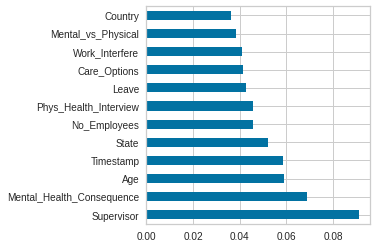

In [138]:
y = encoded_data.Discusion_Coworker  # Showing our trageted features
X = encoded_data.drop(["Discusion_Coworker"], axis=1)

# Let's fit in our model
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#Plotting our targeted features which is the  important features for a better visualization
chosen_feature = pd.Series(model.feature_importances_, index=X.columns)
chosen_feature.nlargest(12).plot(kind='barh')
plt.show()

Data Normalization

In [139]:
# These are the most colser correlated feature that have great impact in our prediction project

Correlated_features = ["Mental_Health_Consequence", "Phys_Health_Interview",  "No_Employees",  "Leave", "Care_Options", "Phys_Health_Interview", "Work_Interfere","Country"]
Correlated_features_1 = encoded_data[Correlated_features]
Correlated_features_1["Discusion_Coworker"] = encoded_data.Discusion_Coworker
Correlated_features_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Mental_Health_Consequence,Phys_Health_Interview,No_Employees,Leave,Care_Options,Phys_Health_Interview,Work_Interfere,Country,Discusion_Coworker
0,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,1,2
2,1,3,1,3,2,3,2,2,3
3,3,1,3,3,3,1,1,3,1
4,1,3,4,2,2,3,3,1,1
...,...,...,...,...,...,...,...,...,...
1252,3,1,4,2,3,1,4,1,1
1253,2,2,2,1,2,2,2,1,1
1255,1,2,3,3,3,2,1,1,1
1256,3,2,2,3,3,2,4,1,2


**Normalization  Using StandardScaler()**

In [140]:
Scaler = StandardScaler()
scaled_Norm = Scaler.fit_transform(Correlated_features_1)
scaled_Norm

array([[-1.08586031, -0.98158043, -1.27590007, ..., -2.06336628,
        -0.45914361, -0.72902671],
       [ 0.19854949,  0.40714121, -0.61285615, ..., -1.12519974,
        -0.45914361,  0.5515483 ],
       [-1.08586031,  1.79586284, -1.27590007, ..., -1.12519974,
        -0.31807689,  1.83212331],
       ...,
       [-1.08586031,  0.40714121,  0.05018776, ..., -2.06336628,
        -0.45914361, -0.72902671],
       [ 1.48295929,  0.40714121, -0.61285615, ...,  0.75113334,
        -0.45914361,  0.5515483 ],
       [ 1.48295929,  0.40714121,  0.71323167, ...,  0.75113334,
        -0.45914361,  0.5515483 ]])

#**UMAP**
This is a dimentional reduction algorthms tool used for data analysis. This is also very similar to PCA in terms of speed and others. We will use the UMAP to check for our data clusters before we move to the PCA

shape: 938 rows, 2, columns (dimensios)


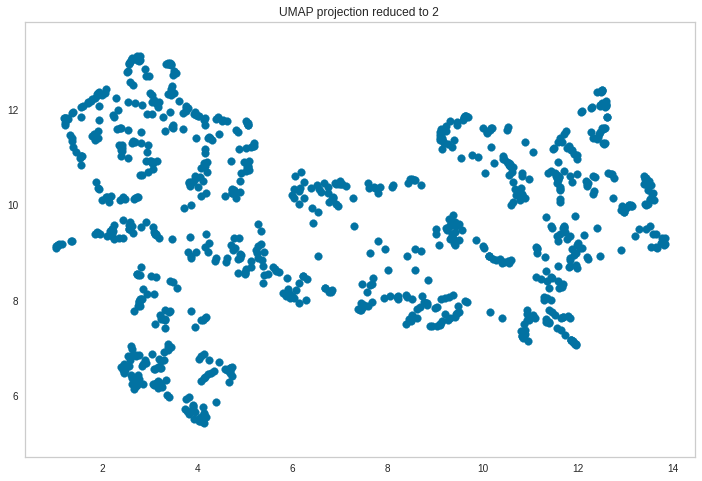

In [141]:
from multiprocessing import reducer
#from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap
#import hdbscan
import sklearn.cluster as cluster
# If Umap encounter errors as the code is reproduced, first install the umap as *import umap.umap_ as umap* and then do *import umap.umap as umap*

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_Norm)
print(f'shape: {embedding.shape[0]} rows, {embedding.shape[1]}, columns (dimensios)')


#Let's dedine our function (def) to plot our cluster in 2D format

def plotter_2d(title: str, cluster_labels= None, legend=False):
    plt.figure(figsize = (12,8))
    sc = plt.scatter(embedding[:,0], embedding[:, 1], c=cluster_labels, s=60, alpha=1.0, cmap="Ankle boot")
    plt.gca().set_aspect("equal", "datalim")
    if legend:
        legend = plt.legend(*sc.legend_elements(alpha=0.9), loc="best", title="clusters")
    
    plt.grid(False)
    plt.title(title)
    plt.show()
    
plotter_2d("UMAP projection reduced to 2 ")

**Result**
Based on the plotted graph, we can see that we have cluster in our data. Next, Let's implement PCA which mean Principal Component Analysis

# **Implementing PCA**

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_Norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.describe()

,principal component 1,principal component 2,principal component 3
count,9.380000e+02,9.380000e+02,9.380000e+02
mean,1.704394e-17,3.219410e-17,-1.515016e-17
std,1.426241e+00,1.095427e+00,1.052189e+00
min,-1.741248e+00,-2.419950e+00,-2.741953e+00
25%,-1.382826e+00,-8.161851e-01,-7.361393e-01
50%,3.595557e-01,-1.902222e-01,5.673304e-03
75%,6.629949e-01,7.152116e-01,6.818020e-01
max,3.072905e+00,3.542318e+00,3.244618e+00


# **HDBSCAN (Density Based on Clustering)**

This type of clustering Algorithm does not required the developer to decide in advance how many cluster they expect to find in the data. It also focus on the high density clustering, which decrese the noise in clustering and allow hierarchical clustering based on the decicion tree approach

In [144]:
# The hdbscan algorthm is very diffcult to implement. But when reproducing this code and you run to some error in this phase, First install this (pip install joblib==1.1.0) and then (pip install hdbscan and HDBSCAN)

# In this phase, we manually input our own paramenter that will give us what we want because grid search cv can not find good value and the DBVC that was produced pervious was very low
import hdbscan
import hdbscan as HDBSCAN

Score_clusterer = hdbscan.HDBSCAN(min_cluster_size=38, min_samples=40, 
                            metric='manhattan', cluster_selection_method='leaf',
                            gen_min_span_tree=True)
Score_clusterer.fit(principalDf)
print(f"DBCV score {Score_clusterer.relative_validity_}")

DBCV score 0.05586529406593134


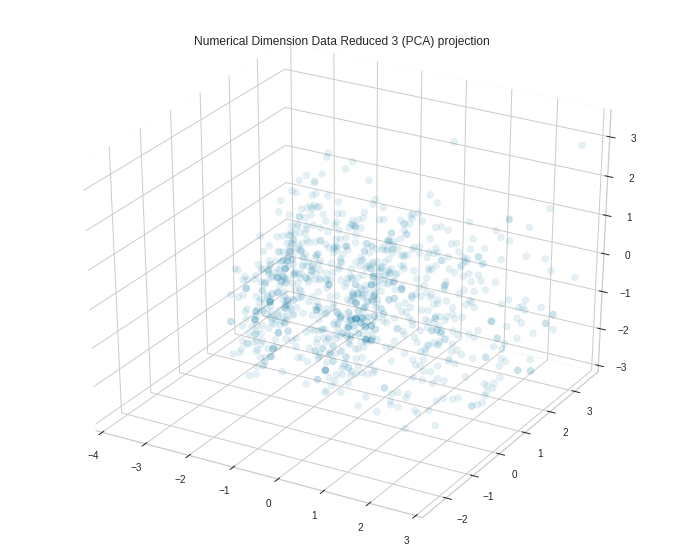

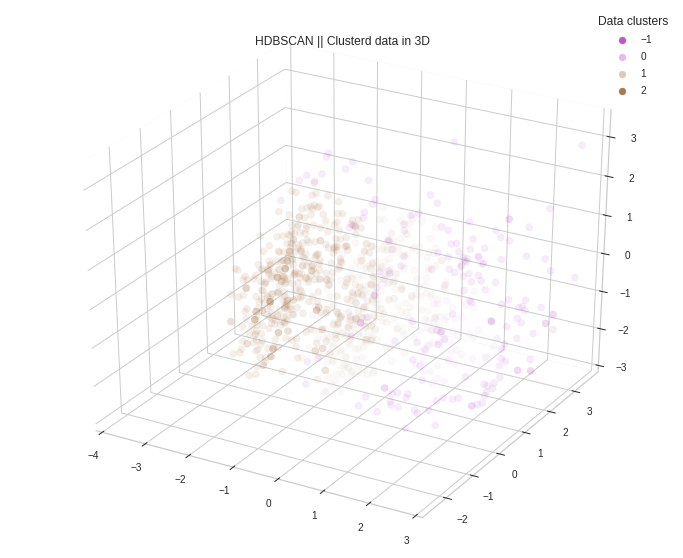

In [145]:
# In this phase, let's define our function, so we can be able to plot our Data in 3D format
def plotter_3d(title: str, cluster_labels=None, legend=False):
    x, y, z = principalDf["principal component 1"], principalDf["principal component 2"], principalDf["principal component 3"] 
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(projection="3d")
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    sc = ax.scatter(x,y,z, c=cluster_labels, s=50, alpha=.1, cmap=cmap)
    ax.set_title(title)
    if legend: 
        legend = plt.legend(*sc.legend_elements(alpha=.9), 
                            loc='best', title='Data clusters')
    plt.xlim(-4, 3)
    plt.show()


plotter_3d( "Numerical Dimension Data Reduced 3 (PCA) projection")

# visualize HBSCAN clusters in 3D
plotter_3d('HDBSCAN || Clusterd data in 3D', Score_clusterer.labels_, legend=True)


# Now join (Append) cluster labels to the original dataframe, thereby aggregating the data

In [146]:
# appending cluster labels to the original dataframe, aggregating the data
Correlated_features_1['HDBSCAN_cluster'] = Score_clusterer.labels_.tolist()
Correlated_features_1.groupby('HDBSCAN_cluster').mean().T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


HDBSCAN_cluster,-1,0,1,2
Mental_Health_Consequence,1.562874,1.929825,1.933131,1.880519
Phys_Health_Interview,2.317365,3.000000,2.000000,1.000000
No_Employees,3.149701,2.859649,3.030395,2.745455
Leave,3.347305,2.052632,2.398176,2.444156
Care_Options,2.269461,2.070175,2.112462,2.090909
Phys_Health_Interview,2.317365,3.000000,2.000000,1.000000
Work_Interfere,2.904192,3.298246,3.258359,3.262338
Country,6.155689,4.578947,3.477204,4.046753
Discusion_Coworker,2.251497,1.403509,1.389058,1.451948


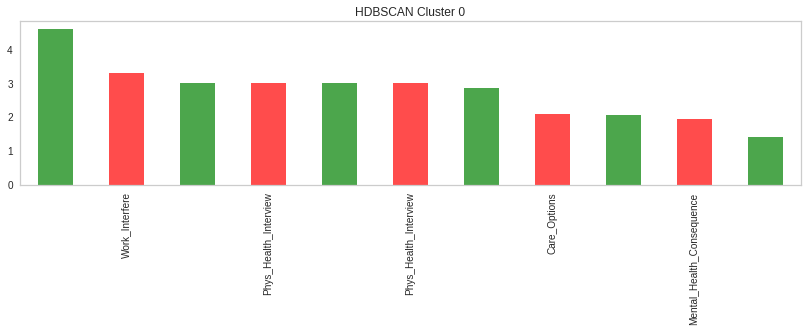

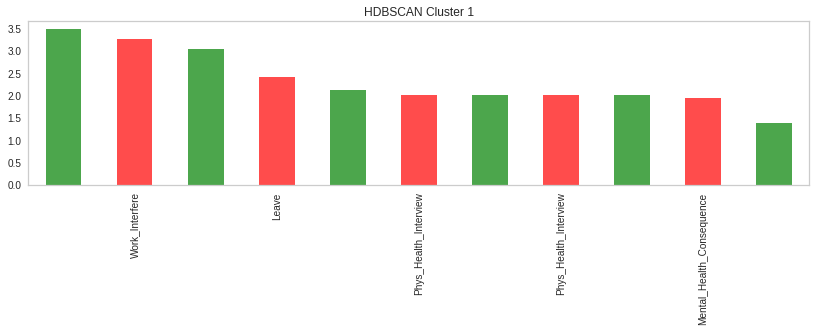

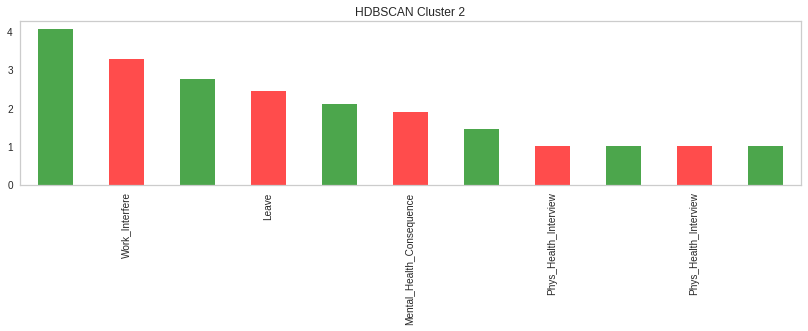

In [147]:
# get visual cluster by cluster 
for i in range(3): 
    plot = Correlated_features_1[Correlated_features_1['HDBSCAN_cluster'] == i].mean()[[col for col in Correlated_features_1.columns.tolist() 
                                        if col not in ['HDBSCAN_cluster']]].sort_values(
        ascending=False).plot.bar(figsize=(14,3), color=['green','red'], alpha=.7)
    plt.title(f'HDBSCAN Cluster {i}')
    plt.setp(plot.get_xticklabels()[::2], visible=False)
    plt.grid(False)
    plt.show()

Visualization Result

Based on the visualization, it is obvious that people in cluster 1 are more likely to have mental Health issue and discuss their mental health to their co_workers

0.7245397050403043


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


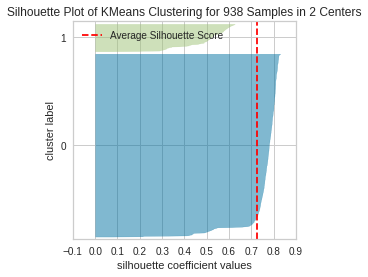

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2, random_state=0).fit(Correlated_features_1)
lab=model.labels_
S = silhouette_score(Correlated_features_1, lab)
print(S)
# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(Correlated_features_1)
visualizer.show()

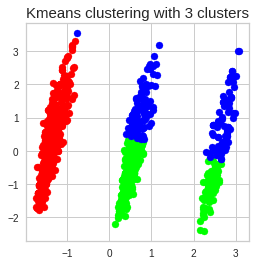

In [149]:
# Previously we have reduced our PCA into 3. Now will reduce it into 2 dimensions

pcaa = PCA(n_components=2)
PCA_Df = pcaa.fit_transform(scaled_Norm)
PCA_Df= pd.DataFrame(PCA_Df)
PCA_Df.columns = ['principal component 1','principal component 2']


# We have three different clusters using elbow method
km = KMeans(n_clusters=3)
y_hat = km.fit_predict(PCA_Df[['principal component 1','principal component 2']])
y_hat
PCA_Df['cluster'] = y_hat

# Let's create 3 DataFrames so we can be able to plot

PCA_Df_1 = PCA_Df[PCA_Df['cluster']==0]
PCA_Df_2= PCA_Df[PCA_Df['cluster']==1]
PCA_Df_3 = PCA_Df[PCA_Df['cluster']==2]

#finally, let's now plot the clusters 

plt.rcParams['figure.figsize']=[4,4]
plt.title('Kmeans clustering with 3 clusters',size=15)
plt.scatter(PCA_Df_1['principal component 1'],PCA_Df_1['principal component 2'],color='lime')
plt.scatter(PCA_Df_2['principal component 1'],PCA_Df_2['principal component 2'],color='red')
plt.scatter(PCA_Df_3['principal component 1'],PCA_Df_3['principal component 2'],color='blue')

